In [1]:
from ipysheet import cell, sheet, row, column, cell_range

sheet1 = sheet(rows=8, columns=2, column_headers=False, row_headers=False)
cell_a = cell(0, 1, 5.20, label_left='V_t(V)')
cell_b = cell(1, 1, 13.2, label_left='R_1(mΩ)')
cell_c = cell(2, 1, 21, label_left='R_2(mΩ)')
cell_d = cell(3, 1, 3.6, label_left='R_3(mΩ)')
cell_e = cell(4, 1, 15.2, label_left='R_4(mΩ)')
cell_f = cell(5, 1, 11.9, label_left='R_5(mΩ)')
cell_g = cell(6, 1, 2.2, label_left='R_6(mΩ)')
cell_h = cell(7, 1, 7.4, label_left='R_7(mΩ)')


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import schemdraw as schem
import schemdraw.elements as e

d = schem.Drawing(unit=2.5)
R7 = d.add(e.RES, d='right', botlabel='$R_7$')
R6 = d.add(e.RES, d='right', botlabel='$R_6$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R5 = d.add(e.RES, d='up' , botlabel='$R_5$')
R4 = d.add(e.RES, d='up', botlabel='$R_4$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R6.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R7.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R7.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('7_resistors_3_loops.png')

# Given:

The circuit diagram below with a driven voltage $V_t = 5.20V$ and resistor values in the table below

In [3]:
sheet1

Sheet(cells=(Cell(column_end=1, column_start=1, row_end=0, row_start=0, type='numeric', value=5.2), Cell(colum…

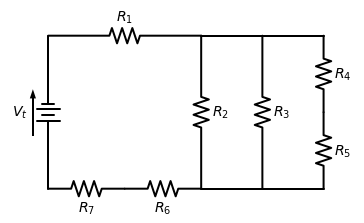

In [2]:
d

# Find $R_t$

Now we'll find the total resistance of the circuit $R_t$ using the individual resistances. First define the resistances and driving voltage as variables.

In [ ]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

# Find $R_4$$_5$ and $R_6$$_7$

To simplify the circuit diagram, we'll combine the resistors in series.

For resistors in a simple series circuit:

$$ R_t = R_1 + R_2 + R_3 ... + R_n $$

Since resistors $R_4$ and $R_5$ are in simple series:
$$ R_{45} = R_4 + R_5 $$
Since resistors $R_6$ and $R_7$ are in simple series:

$$ R_{67} = R_6 + R_7 $$
We can easily calculate this with Python. After the calculation, we can use an fstring to print the results. Note the round() function is used on the inside of the fstring curly braces { }, in case there are some floating point math errors that lead to the values printing out as long floats.

In [ ]:
R45 = R4 + R5
R67 = R6 + R7

print(f'R45 = {round(R45,7)} Ohm, R67 = {round(R67,5)} Ohm')

Redrawing our circuit diagram to show the combined resistors

In [ ]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
d.add(e.LINE, d='right', l=2)
d.add(e.LINE, d='right', l=2)
R45 = d.add(e.RES, d='up', botlabel='$R_{45}$')
d.add(e.LINE, d='left', l=2)
d.push()
R3 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_3$')
d.pop()
d.add(e.LINE, d='left', l=2)
d.push()
R2 = d.add(e.RES, d='down', toy=R67.end, botlabel='$R_2$')
d.pop()
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('5_resistors_3_loops.png')
d

# Find $R_2$$_3$$_4$$_5$

Next we can combine the resistors in parallel. The resistors in parallel are $R_2$, $R_3$ and $R_{45}$. For a resistors in a simple parallel circuit:

$$ \frac{1}{R_t} = \frac{1}{R_1} + \frac{1}{R_2} + \frac{1}{R_3} ... + \frac{1}{R_n} $$
Since $R_2$, $R_3$ and $R_{45}$ are in parallel:

$$ \frac{1}{R_{2345}} = \frac{1}{R_2} + \frac{1}{R_3} + \frac{1}{R_{45}} $$$$ R_{2345} = \frac{1}{\frac{1}{R_2} + \frac{1}{R_3} + \frac{1}{R_{45}}} $$
We can code this calculation in Python. To find the reciprocal, raise the combined sum to the negative one power. Remember, exponentiation is performed with a double asterisk ** in Python.

In [ ]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

R45 = R4 + R5
R67 = R6 + R7

R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)
print(f'R2345 = {round(R2345,7)} Ohm')

Constructing a new SchemDraw diagram of the simplified the circuit. In this diagram, we'll combine $R_2$, $R_3$ and $R_{45}$ into one big resistor, $R_{2345}$.

In [ ]:
d = schem.Drawing(unit=2.5)
R67 = d.add(e.RES, d='right', botlabel='$R_{67}$')
R345 = d.add(e.RES, d='up' , botlabel='$R_{2345}$')
R1 = d.add(e.RES, d='left', tox=R67.start, label='$R_1$')
Vt = d.add(e.BATTERY, d='up', xy=R67.start, toy=R1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('3_resistors_1_loop.png')
#d.save('3_resistors_1_loop.pdf')
d

# Find $R_t$

To find $R_t$, we again combine the resistors in series. The remaining resistors $R_1$, $R_{2345}$ and $R_{67}$ are in series:

$$ R_{1234567} = R_1 + R_{2345} + R_{67} $$
We'll call the total resistance of the circuit $R_t$ which is equal to $R_{1234567}$

$$ R_t = R_{1234567} $$
Another calculation in Python.

In [ ]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

R45 = R4 + R5
R67 = R6 + R7

R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)

Rt = R1 + R2345 + R67
print(f'Rt = {round(Rt,7)} Ohm')

In [ ]:
d = schem.Drawing(unit=2.5)
L2 = d.add(e.LINE, d='right')
Rt = d.add(e.RES, d='up' , botlabel='$R_{t}$')
L1 = d.add(e.LINE, d='left', tox=L2.start)
Vt = d.add(e.BATTERY, d='up', xy=L2.start, toy=L1.end, label='$V_t$', lblofst=0.3)
d.labelI(Vt, arrowlen=1.5, arrowofst=0.5)
d.draw()
d.save('1_resistor_no_loops.png')
#d.save('1_resistor_no_loops.pdf')
d

# Find $V_6$ and $V_7$

Now that we've solved for the total resistance of the circuit $R_t$, we can find the total current running through the circuit using Ohm's Law $V = IR $.

$$ V = IR $$$$ I = \frac{V}{R} $$$$ I_t = \frac{V_t}{R_t} $$

In [ ]:
Vt = 5.2

R1 = 0.0132
R2 = 0.021
R3 = 0.00360
R4 = 0.0152
R5 = 0.0119
R6 = 0.0022
R7 = 0.00740

R45 = R4 + R5
R67 = R6 + R7

R2345 = ((1/R2)+(1/R3)+(1/R45))**(-1)
Rt = R1 + R2345 + R67

It = Vt/Rt
print(f'It = {round(It,2)} A')

The total current of the circuit, $I_t$ is the same as the current running through resistor $R_6$ and resistor $R_7$.

$$ I_t = I_6 = I_7 $$
We can apply Ohm's law to find $V_6$ now that we have $I_6$ and $I_7$.

$$ V_6 = I_6 R_6 $$$$ V_7 = I_7 R_7 $$

In [ ]:
I6 = It
I7 = It
V6 = I6 * R6
V7 = I7 * R7
print(f'V6 = {round(V6,5)} V, V7 = {round(V7,5)} V')

# Find $I_3$ and $I_6$
The total current of the circuit, $I_t$ is the same as the current running through resistor $R_{2345}$.

$$ I_t = I_{2345} $$
We can apply Ohm's law to find $V_{2345}$ now that we have $I_{2345}$.

$$ V_{2345} = I_{2345} R_{2345} $$

In [ ]:
I2345 = It
V2345 = I2345 * R2345
print(f'V2345 = {round(V2345,5)} V')

The voltage drop across resistor $R_3$ is the same as the voltage drop across resistor $R_{2345}$.

$$ V_3 = V_{2345} $$
Since $V_3$ and $R_3$ are known, we can solve for $I_3$ using Ohm's law:

$$ V = IR $$$$ I = \frac{V}{R} $$$$ I_3 = \frac{V_3}{R_3} $$
The current $I_6$ running through resistor $R_6$ is the same as the total current $I_t$.

$$ I_6 = I_t $$


In [ ]:
V3 = V2345
I3 = V3 / R3

I6 = It

print(f'I3 = {round(I3,2)} A, I6 = {round(I6,2)} A')

# Find $P_7$ and $P_4$
Power is equal to voltage times current:

$$ P = VI $$
According to Ohm's law:

$$V = IR$$
If we substitute $V$ as $IR$ in the power equation we get:

$$ P = (IR)(I) $$$$ P = I^2 R $$
With a known $R_7$ and $I_7 = I_t$:

$$ P_7 = {I_7}^2 R_7 $$

In [ ]:
I7 = It
P7 = R7 * I7**2
print(f'P7 = {round(P7,2)} W')

Current $I_{45}$ is equal to current $I_4$. Voltage $V_{45} = V_{2345}$. Using Ohm's Law again:

$$ V = IR $$$$ I = \frac{V}{R} $$$$ I_{45} = \frac{V_{45}}{R_{45}} $$

In [ ]:
V45 = V2345
I45 = V45/R45
print(f'I45 = {round(I45,3)} A')

$$ P = I^2 R $$
With a known $R_4$ and $I_4 = I_{45}$:

$$ P_4 = {I_4}^2 R_4 $$

In [ ]:
I4 = I45
P4 = R4 * I4**2
print(f'P4 = {round(P4,4)} W')

# Final Answers

In [ ]:
print(f'V6 = {round(V6,3)} V')
print(f'V7 = {round(V7,2)} V')
print(f'I3 = {round(I3,0)} A')
print(f'I6 = {round(I6,0)} A')
print(f'P4 = {round(P4,2)} W')
print(f'P7 = {round(P7,0)} W')